In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
import numpy as np
import time

import yfinance as yf
from pandas_datareader import data as pdr
from scipy.stats import norm

## Helper Functions

In [30]:
def brand_glance(brand):
    i_brand = BAV_2019.index==brand
    quick_cols = ['Energized_Differentiation_R', 'Relevance_R', 'Esteem_R', 'Knowledge_R']
    print(BAV_2019.iloc[i_brand][quick_cols])

In [152]:
def get_stock_data(ticker):
    #Use ticker to pull financial data from Polygon API
    lookup_url = 'https://api.polygon.io/v2/reference/financials/'
    query = '?limit=3&type=T&apiKey=znY3_peGnZRXAcpXCeW3i2UVdCKz28Bq'
    stock_data = requests.get(lookup_url + ticker + query).json()
    
    return stock_data

In [164]:
def get_ticker_details(ticker):
    lookup_url = 'https://api.polygon.io/v1/meta/symbols/'
    query = '/company?&apiKey=znY3_peGnZRXAcpXCeW3i2UVdCKz28Bq'
    
    return requests.get(lookup_url + ticker + query).json()

In [198]:
def get_market_cap(ticker):
    if not ticker:
        return None
    try:
        stock = yf.Tickers(ticker)
        return stock.tickers[0].info['marketCap']
    except:
        time.sleep(.1) # Slight pause every few calls so API doesn't timeout
        return None

## EDA

In [3]:
# Load the Clean 2019 BAV data
BAV_2019 = pd.read_csv('../data/BAV_2019.csv', header=0, index_col=0)

# Load the Clean 2018 BAV data
BAV_2018 = pd.read_csv('../data/BAV_2018.csv', header=0, index_col=0)

In [44]:
BAV_2018.shape

(3522, 155)

***Problem:*** Want to get the number of columns down to something more reasonable. Only need the '_R' columns for analysis, so will condense both years to just these columns and the other relevant string columns.

In [52]:
rel_cols = ['Brand_ID', 'Energized_Differentiation_R', 'Relevance_R', 'Esteem_R', 'Knowledge_R', 'Brand_Stature_R', 'Brand_Strength_R', 'Brand_Asset_R', 'Different_R', 'Distinctive_R', 'Unique_R', 'Dynamic_R', 'Innovative_R', 'Leader_R', 'Reliable_R', 'High_Quality_R', 'Arrogant_R', 'Authentic_R', 'Best_Brand_R', 'Carefree_R', 'Cares_Customers_R', 'Charming_R', 'Cool_R', 'Creative_R', 'Daring_R', 'Down_To_Earth_R', 'Energetic_R', 'Friendly_R', 'Fun_R', 'Gaining_in_Popularity_R', 'Glamorous_R', 'Good_Value_R', 'Healthy_R', 'Helpful_R', 'High_Performance_R', 'Independent_R', 'Intelligent_R', 'Kind_R', 'Original_R', 'Prestigious_R', 'Progressive_R', 'Rugged_R', 'Sensuous_R', 'Simple_R', 'Social_R', 'Socially_Responsible_R', 'Straightforward_R', 'Stylish_R', 'Traditional_R', 'Trendy_R', 'Trustworthy_R', 'Unapproachable_R', 'Up_To_Date_R', 'Upper_Class_R', 'Visionary_R', 'Worth_More_R', 'company', 'ticker_symbol']

In [53]:
BAV_2019_clean = BAV_2019[rel_cols]

BAV_2019_clean.shape
BAV_2019_clean.head(3)

,Brand_ID,Energized_Differentiation_R,Relevance_R,Esteem_R,Knowledge_R,Brand_Stature_R,Brand_Strength_R,Brand_Asset_R,Different_R,Distinctive_R,...,Traditional_R,Trendy_R,Trustworthy_R,Unapproachable_R,Up_To_Date_R,Upper_Class_R,Visionary_R,Worth_More_R,company,ticker_symbol
Company 2019,,,,,,,,,,,,,,,,,,,,,
Acura,AVE,72.705315,19.082125,71.545891,71.642509,74.057968,41.884056,71.497581,38.260868,83.961349,...,42.415459,74.154587,63.236713,61.062801,68.695656,94.782608,79.178741,73.091789,Acura,NaN
Alfa Romeo,CQK,91.980675,3.574879,17.681160,41.787441,35.893719,39.227055,37.874397,64.637680,97.342995,...,20.531401,60.483093,6.280193,92.077293,22.222221,98.502419,57.922707,69.227051,Alfa Romeo,RMO
Aston Martin,MKU,97.101448,2.125604,52.705315,42.367149,49.275364,44.637680,52.705315,81.642509,99.178741,...,20.966183,65.458939,21.932367,98.019325,35.507248,99.227051,76.425117,75.410629,Aston Martin,NaN


In [54]:
BAV_2018_clean = BAV_2018[rel_cols]
BAV_2018_clean.head(3)

,Brand_ID,Energized_Differentiation_R,Relevance_R,Esteem_R,Knowledge_R,Brand_Stature_R,Brand_Strength_R,Brand_Asset_R,Different_R,Distinctive_R,...,Traditional_R,Trendy_R,Trustworthy_R,Unapproachable_R,Up_To_Date_R,Upper_Class_R,Visionary_R,Worth_More_R,company,ticker_symbol
Company 2018,,,,,,,,,,,,,,,,,,,,,
Acura,AVE,59.728287,20.912178,71.858322,73.459488,74.915092,35.128578,70.839401,38.961670,72.731682,...,10.965550,73.896164,62.785057,66.472588,57.836002,93.498299,85.929161,58.466763,Acura,NaN
Alfa Romeo,CQK,94.080544,2.134886,27.947598,39.446869,39.543911,37.020863,41.436195,80.397865,97.816597,...,20.329937,75.109169,11.644833,98.010674,49.102379,98.447357,44.347404,79.815620,Alfa Romeo,RMO
Aston Martin,MKU,94.323143,1.407084,26.880156,46.579330,43.085880,31.246967,43.182922,80.009705,98.495872,...,2.328967,55.749638,11.887433,97.185829,9.024745,99.369240,56.914120,81.125664,Aston Martin,NaN


### Create New DataFrame for Stock Data

In [72]:
stock_data = pd.DataFrame()
stock_data['ticker_symbol'] = BAV_2019_clean['ticker_symbol']

In [73]:
stock_data.head()

,ticker_symbol
Company 2019,
Acura,NaN
Alfa Romeo,RMO
Aston Martin,NaN
Audi,NaN
Bentley,BSY


In [199]:
stock_data['current_market_cap'] = BAV_2019_clean['ticker_symbol'].apply(lambda x: None if x is np.NaN else get_market_cap(x))

In [205]:
stock_data.head(33)

,ticker_symbol,current_market_cap
Company 2019,,
Acura,NaN,NaN
Alfa Romeo,RMO,1.456783e+09
Aston Martin,NaN,NaN
Audi,NaN,NaN
Bentley,BSY,1.216644e+10
BMW,NaN,NaN
Buick,NaN,NaN
Cadillac,NaN,NaN
Chevrolet,NaN,NaN


### Merge Stock Data with Brand Data

***Note:*** There will be more stock data to collect and analyze. The working hypothesis is that market capitalization, or more specifically, the percentage delta in annual market capitalization will be the ultimate target feature for prediction. This specific feature will require some feature engineering but the goal will be to get these to percentage values in line with the independent variables in the set.

In [211]:
BAV_2019_clean['current_market_cap'] = stock_data['current_market_cap']
BAV_2018_clean['current_market_cap'] = stock_data['current_market_cap']
BAV_2018_clean.tail(10)

/Users/jerryroback/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/jerryroback/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Brand_ID,Energized_Differentiation_R,Relevance_R,Esteem_R,Knowledge_R,Brand_Stature_R,Brand_Strength_R,Brand_Asset_R,Different_R,Distinctive_R,...,Trendy_R,Trustworthy_R,Unapproachable_R,Up_To_Date_R,Upper_Class_R,Visionary_R,Worth_More_R,company,ticker_symbol,current_market_cap
Company 2018,,,,,,,,,,,,,,,,,,,,,
Tea Party Movement,WRBM,66.666664,8.005822,5.288695,55.555557,34.740417,25.424551,33.284813,93.546822,65.259583,...,32.071812,6.356138,99.514801,7.908782,46.530811,74.235809,5.337215,Tea Party Movement,PRTY,6.223194e+08
Bloomberg,WNGU,40.659874,24.405628,58.175644,51.673946,57.059681,26.103832,54.488113,63.173218,14.895681,...,40.368752,59.243088,87.772926,58.515285,88.258125,78.845222,24.696749,Bloomberg,NaN,NaN
Capital IQ,BDBS,87.336243,61.135372,65.016983,10.819990,21.445900,81.513824,36.341583,71.664238,53.372150,...,30.761766,70.984962,94.808342,77.632217,86.851044,90.004852,45.220768,Capital IQ,IQ,NaN
Equifax,WJXS,15.526443,81.222710,62.154293,71.179039,68.995636,46.385250,68.461914,10.237749,31.149927,...,12.954876,74.478409,83.260551,62.590977,26.394955,59.291607,16.108685,Equifax,EFX,2.234220e+10
Experian,WODQ,10.577390,80.446388,67.151871,60.067928,65.550705,39.883553,64.337700,6.647259,23.871906,...,13.779718,73.944687,87.045120,71.567200,31.780689,52.692867,9.655507,Experian,NaN,NaN
FactSet,BDCK,80.300827,71.518677,25.084909,5.385735,5.919456,81.465309,13.440078,89.034447,40.999516,...,67.006310,49.878700,93.013100,75.836975,59.437168,68.850075,31.635128,FactSet,FDS,1.236659e+10
FICO,WODP,20.766619,89.082970,75.691414,61.863174,72.343521,63.755459,74.235809,17.709850,27.025715,...,14.653081,76.904419,77.535179,67.879669,37.166424,54.051430,18.292091,FICO,FICO,1.441077e+10
LifeLock,BDCU,76.322174,32.411449,78.408539,59.582726,72.440559,57.738960,73.508003,50.800583,50.557983,...,44.492966,91.557495,39.883553,91.169334,66.957787,95.245026,76.467735,LifeLock,NaN,NaN
Quicken,BEJ,34.788937,20.524017,59.631248,55.118874,60.164967,20.718098,55.264435,37.554585,22.416304,...,20.087336,56.234837,45.172245,80.058228,14.313440,64.434738,18.825813,Quicken,NaN,NaN


### Visualizations

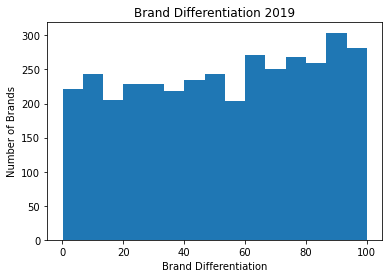

In [212]:
_ = plt.hist(BAV_2019_clean['Energized_Differentiation_R'], bins=15)
_ = plt.xlabel('Brand Differentiation')
_ = plt.ylabel('Number of Brands')
_ = plt.title('Brand Differentiation 2019')
plt.show()

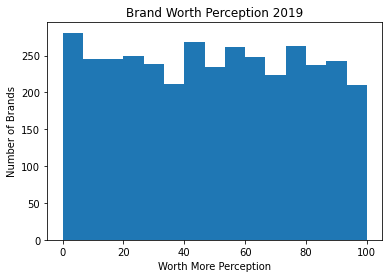

In [213]:
_ = plt.hist(BAV_2019_clean['Worth_More_R'], bins=15)
_ = plt.xlabel('Worth More Perception')
_ = plt.ylabel('Number of Brands')
_ = plt.title('Brand Worth Perception 2019')
plt.show()

In [215]:
#Summary Columns
stature_and_strength = ['Brand_Stature_R', 'Brand_Strength_R']
summary_cols = ['Energized_Differentiation_R', 'Relevance_R', 'Esteem_R', 'Knowledge_R']

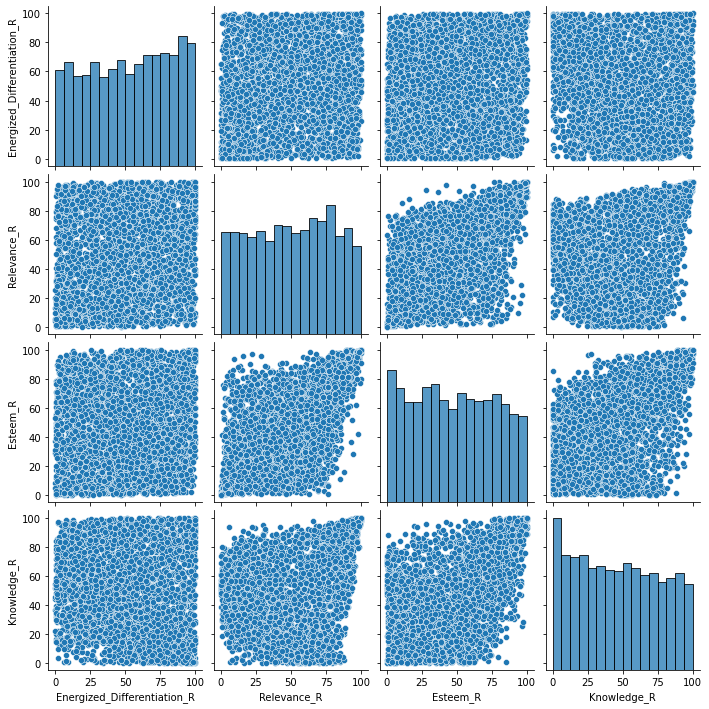

In [216]:
#Pairplot of features
_ = sns.pairplot(BAV_2019_clean[summary_cols])
plt.show()

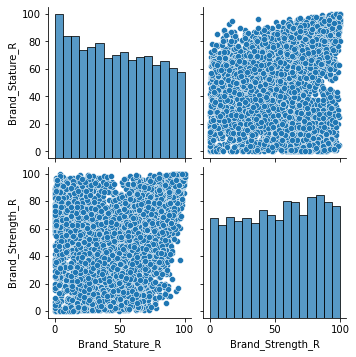

In [217]:
#Pairplot of features
_ = sns.pairplot(BAV_2019_clean[stature_and_strength])
plt.show()

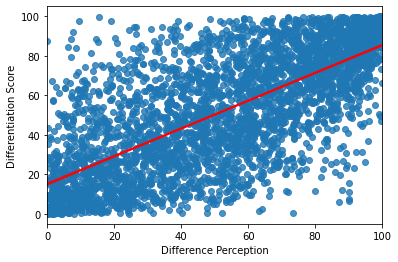

In [222]:
#Does the 'Different' perception correlate with Differntiation?
_ = sns.regplot(x='Different_R', y='Energized_Differentiation_R', data=BAV_2019_clean, line_kws={'color': 'red'})
_ = plt.xlabel('Difference Perception')
_ = plt.ylabel('Differentiation Score')
plt.show()

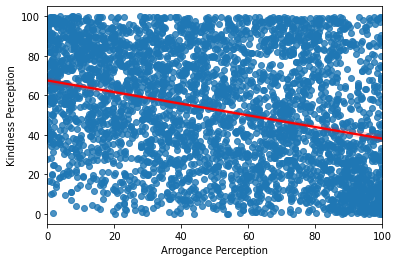

In [224]:
#What about Arrogant and Kind? Negatively correlated?
_ = sns.regplot(x='Arrogant_R', y='Kind_R', data=BAV_2019_clean, line_kws={'color': 'red'})
_ = plt.xlabel('Arrogance Perception')
_ = plt.ylabel('Kindness Perception')
plt.show()

***Experiment:*** How significant are the year over year changes? We know there has been a push across the board in brands attempting to build their perception around social responsibility. How did this attribute change between 2018 and 2019 in the eyes of consumers? Was this observed change significant or expected?

In [242]:
#Did Perceptions around 'Social Responsibility' differ from 2018 and 2019?
#Does the top 20 percentile get more or less dense?
top_quintile_19 = norm.cdf(x=[80], loc=np.mean(BAV_2019_clean['Socially_Responsible_R']), scale=np.std(BAV_2019_clean['Socially_Responsible_R']))
p_val_2019 = 1 - top_quintile_19
print('2019: {}'.format(p_val_2019[0]))

top_quintile_18 = norm.cdf(x=[80], loc=np.mean(BAV_2018_clean['Socially_Responsible_R']), scale=np.std(BAV_2018_clean['Socially_Responsible_R']))
p_val_2018 = 1 - top_quintile_18
print('2018: {}'.format(p_val_2018[0]))

2019: 0.1719136549803636
2018: 0.1627590960387424


In [253]:
#Is that increase in 2019 within the 95% confidence interval for 2018?
sr_mean_2018 = np.mean(BAV_2018_clean['Socially_Responsible_R'])
sr_std_2018 = np.std(BAV_2018_clean['Socially_Responsible_R'])
se = sr_std_2018 / (np.sqrt(len(BAV_2018_clean)))

z = 1.96
conf = (se * z)/100
print(conf)

#Top Quintiles
print('2019: {}'.format(top_quintile_19))
print('2018: {}'.format(top_quintile_18))

print('Top range of the 95th percentile confidence interval for 2018 is: {}'.format(top_quintile_18 - conf))

0.009771913212031634
2019: [0.82808635]
2018: [0.8372409]
Top range of the 95th percentile confidence interval for 2018 is: [0.82746899]


***Takeaway:*** The 2019 'social responsibility' perception falls within the range of expected values for 2018. The change within this attribute for 2019 is not statistically significant.